<a href="https://colab.research.google.com/github/NourhanZahran/Collection-data-chemical.space.analysis/blob/main/SVM_classifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("PubChemFP_best.csv")


In [ ]:
df = pd.read_csv("PubChemFP_best.csv")


X = df.drop("label",axis=1)

y = df["label"]

In [ ]:
X.to_csv("Pubchem_features.csv",index=None)

In [ ]:
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,...,PubchemFP840,PubchemFP841,PubchemFP842,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP866,PubchemFP872,PubchemFP875
0,1,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef,roc_auc_score,make_scorer,auc


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

0    1141
1     543
Name: label, dtype: int64

In [ ]:
smote = SMOTE(random_state=42,sampling_strategy=0.5)

In [ ]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    1141
1     570
Name: label, dtype: int64

In [ ]:
SN = make_scorer(recall_score)

SP = make_scorer(recall_score,pos_label=0)


Q = make_scorer(accuracy_score)

MCC = make_scorer(matthews_corrcoef)


scoring = {"SN":SN,"SP":SP,"Q":Q,"MCC":MCC}

In [ ]:
clf = svm.SVC(kernel='linear',random_state=12)

In [ ]:
cv_results = pd.DataFrame(cross_validate(clf,X_train,y_train,cv=10,scoring=scoring))

In [ ]:
cv_results.describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,10.0,0.283970,0.031458,0.237135,0.264504,0.279048,0.297337,0.349863
score_time,10.0,0.023542,0.003470,0.020329,0.021147,0.022199,0.025334,0.030319
test_SN,10.0,0.903509,0.026478,0.859649,0.894737,0.894737,0.907895,0.947368
test_SP,10.0,0.934256,0.023512,0.903509,0.914474,0.938596,0.947712,0.973684
test_Q,10.0,0.924007,0.015646,0.900585,0.915205,0.923977,0.935673,0.947674
test_MCC,10.0,0.831697,0.033111,0.782740,0.811796,0.833579,0.854513,0.884136


In [ ]:
clf.fit(X_train,y_train)

yHat_train= clf.predict(X_train)

yHat_test = clf.predict(X_test)



In [ ]:
print(recall_score(y_train,yHat_train)) #SN
print(recall_score(y_train,yHat_train,pos_label=0)) #SP
print(matthews_corrcoef(y_train,yHat_train)) #MCC
print(accuracy_score(y_train,yHat_train)) # Q

0.9614035087719298
0.9737072743207712
0.9318895483943609
0.9696084161309176


In [ ]:
print(recall_score(y_test,yHat_test))
print(recall_score(y_test,yHat_test,pos_label=0))
print(matthews_corrcoef(y_test,yHat_test))
print(accuracy_score(y_test,yHat_test))
print(roc_auc_score(y_test,clf.predict.proba(X_test)[:, 1]))


0.9139072847682119
0.922509225092251
0.8274071687677912
0.919431279620853


AttributeError: ignored

In [ ]:
from sklearn.metrics import RocCurveDisplay

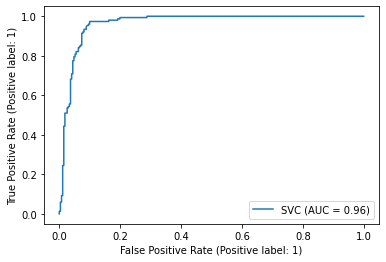

In [ ]:
RocCurveDisplay.from_estimator(clf,X_test,y_test)

In [ ]:
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay,classification_report

In [ ]:
print(classification_report(y_test,yHat_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       271
           1       0.87      0.91      0.89       151

    accuracy                           0.92       422
   macro avg       0.91      0.92      0.91       422
weighted avg       0.92      0.92      0.92       422



In [ ]:
cm = confusion_matrix(y_test,yHat_test)

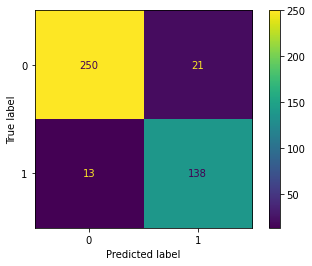

In [ ]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('caspase_model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('caspase_model.pkl', 'rb'))

In [ ]:
feat_imp = pd.Series(clf.feature_importances_,index=X.columns).nlargest(15)

AttributeError: ignored